## Using DifferentialEquations.jl

In [150]:
using Pkg

In [151]:
using DifferentialEquations

In [78]:
using Plots

## The example problem 

\begin{equation*}
\frac{d u}{d t}=f(u, p, t)
\end{equation*}

# Model Rocket in Cartesian coordinate system 

$$
\begin{array}{l}
\left\{\begin{array}{l}
y^{\prime}=v \cos (\theta) \\
x^{\prime}=v \sin (\theta) \\
m \vec{v}^{\prime}=\vec{T}-\vec{D}-\vec{G} \\
m v_{y}^{\prime}=(T-D)\cos(\theta)-G\\
m v_{x}^{\prime}=(T-D)\sin(\theta) \\
D=\rho c_D A v^2 \\
m^{\prime}=-{m}_{f u e l}^{\prime} \\
T = m^{\prime}_{f u e l} u_{e} \\
m^{\prime}_{f u e l} = c \\
G = mg\frac{R_e^2}{(y+R_e)^2}
\end{array}\right. \\
\end{array}
$$

Arrange the system 

$$
\begin{array}{l}
\left\{\begin{array}{l}
y^{\prime}= v_{||}\cos(\theta)  \\
x^{\prime}= v_{||}\sin(\theta) \\
v^{\prime}_{||}= (- \frac{m^{\prime}}{m} u_{e} - \frac{\rho c_D A}{m}v^2) - g\frac{R_e^2}{(y+R_e)^2}cos(\theta)\\
{\theta}^{\prime} = g\frac{\sin(\theta)}{v_{||}} \\
m^{\prime}= -c \\
\end{array}\right. \\
\end{array}
$$

## Line 3 $V_{\perp} \& V_{||}$

In [79]:
function Mflag(t)
    f = - 1/2 * (- sign(m_fuel - m_minus * t) - 1)
    return f
end

Mflag (generic function with 1 method)

In [80]:
function Yflag(h)
    f = 1/2 * (1 + sign(h - y + 0.1))
    return f
end

Yflag (generic function with 1 method)

In [81]:
function theta_delay(v)
    if v < v_1
        return 0.5/(1+exp((0+v_1)/2-v))
    elseif v_1 <= v < v_2
        return 0.5 + 0.5/(1+exp((v_1+v_2)/2-v))
    else
        return 1
    end
end

theta_delay (generic function with 1 method)

In [153]:
function line3!(du,u,p,t)
    du[1] = Yflag(u[1]) * u[3] * cos(u[4]) ##y
    du[2] = Yflag(u[1]) * u[3] * sin(u[4]) ##x
    du[3] = Yflag(u[1]) * ((- (u_e * du[5]) - k_aero * (u[3]^2)/u[5]) - 9.8 * cos(u[4]))  ##v       
    #du[4] = theta_delay(u[3]) * 9.8 * sin(u[4])/u[3] ##theta
    du[4] = theta_delay(u[3]) * 9.8 * sin(u[4])/u[3] ##theta
    du[5] = - m_minus * Mflag(t)   ##m
end

line3! (generic function with 1 method)

In [152]:
m_minus = 0
y = 0
theta0 = deg2rad(6)

m_fuel = 0.15
m_rocket = 0.03
m = m_fuel + m_rocket

u_e = 550

v_1 = 0.16
v_2 = 1

rho = 1.22
C_D = 0.35
Area = 0.004
k_aero = 1/2 * rho * C_D * Area

v_0 = 100

100

In [148]:
u0 = [0.0;0.0;v_0;theta0;m]
#u0 = [0.0;0.0;v_0;v_0*tan(theta0);m]
tspan = (0.0,20.0)
prob = ODEProblem(line3!,u0,tspan)
sol = solve(prob, OwrenZen3() ,dt = 0.001)

retcode: Success
Interpolation: specialized 3rd order "free" interpolation
t: 69-element Array{Float64,1}:
  0.0
  0.001
  0.0035840623899116198
  0.00817309085893031
  0.01574826478217372
  0.02732769354287302
  0.04409588768167835
  0.06720526649773302
  0.09782259492435759
  0.1370281464784412
  0.18584346129046309
  0.24520147568952222
  0.3159678212749052
  ⋮
  9.161352889055303
  9.661671691040244
 10.18527350103946
 10.72811014571513
 11.285373091329884
 11.848862255857334
 12.401733714061264
 12.902222596579396
 14.734056716457108
 16.0308474857625
 18.171098058548605
 20.0
u: 69-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 100.0, 0.10471975511965978, 0.18]
 [0.0994237062696048, 0.010450367544107123, 99.94283636631548, 0.10473000233799794, 0.18]
 [0.35607726861959654, 0.037431840842737645, 99.79537273453064, 0.10475651356274053, 0.18]
 [0.8109334156248998, 0.08526689460806834, 99.53438012539777, 0.10480370782816864, 0.18]
 [1.5591680711695437, 0.16400257846915084, 99.10602218

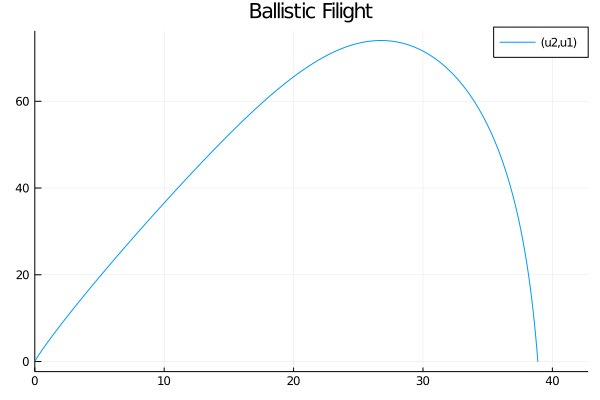

In [209]:
plot(sol,vars=(2,1),title = "Ballistic Filight", marker = (:circle,0.001))

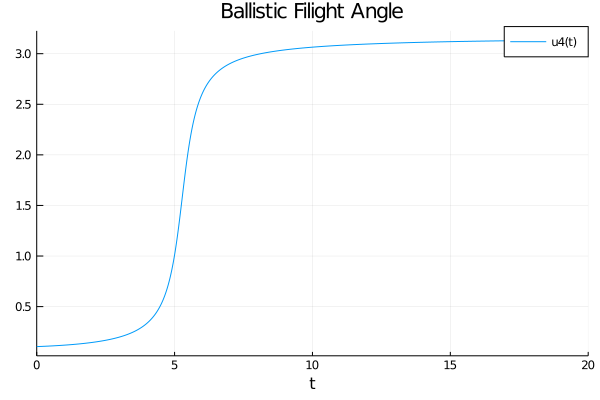

In [169]:
plot(sol,vars=(4),title = "Ballistic Filight Angle")

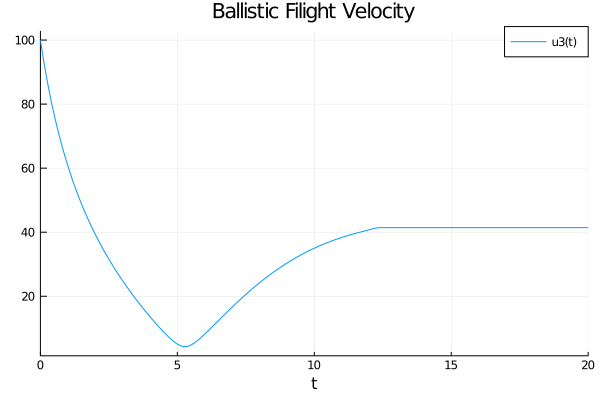

In [171]:
plot(sol,vars=(3),title = "Ballistic Filight Velocity")

## Model II Line 4

In [228]:
m_minus = 0.05
y = 0
theta0 = deg2rad(6)

m_fuel = 0.15
m_rocket = 0.03
m = m_fuel + m_rocket

u_e = 550

v_1 = 0.16
v_2 = 1

rho = 1.22
C_D = 0.35
Area = 0.004
k_aero = 1/2 * rho * C_D * Area

v_0 = 0.1

0.1

In [229]:
u0 = [0.0;0.0;v_0;theta0;m]
#u0 = [0.0;0.0;v_0;v_0*tan(theta0);m]
tspan = (0.0,20.0)
prob = ODEProblem(line3!,u0,tspan)
sol = solve(prob, OwrenZen3() ,dt = 0.001)

retcode: Success
Interpolation: specialized 3rd order "free" interpolation
t: 109-element Array{Float64,1}:
  0.0
  0.001
  0.0010405485045940066
  0.001061829334974286
  0.0012746376387770789
  0.0017006284085788119
  0.0022865032286147986
  0.0031697373281474525
  0.004356143405239749
  0.004935301782003912
  0.005435411008838962
  0.0056086615971622095
  0.007341167480394683
  ⋮
  7.840677949044753
  8.36301674587262
  8.949545337976385
  9.609171147337161
 10.354346181600455
 11.202058509198384
 12.17605636407742
 13.31026745602326
 14.654711324615644
 16.287173737141003
 18.33759231261586
 20.0
u: 109-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.1, 0.10471975511965978, 0.18]
 [9.459288081761263e-5, 1.0068638478957685e-5, 0.09025503375949567, 0.10746980588208599, 0.17995]
 [9.823784656818785e-5, 1.0462096884825425e-5, 0.09073498306014995, 0.10758834474764124, 0.1799479725747703]
 [0.00010016158877792097, 1.066993176375215e-5, 0.0911128594748143, 0.10765027377424012, 0.179946908

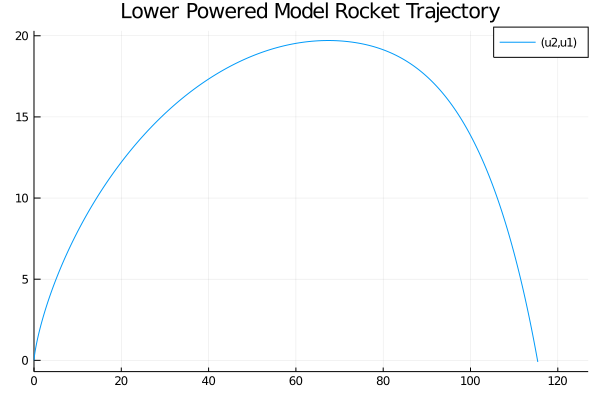

In [233]:
plot(sol,vars=(2,1),title = "Lower Powered Model Rocket Trajectory", marker = (:circle,0.001))

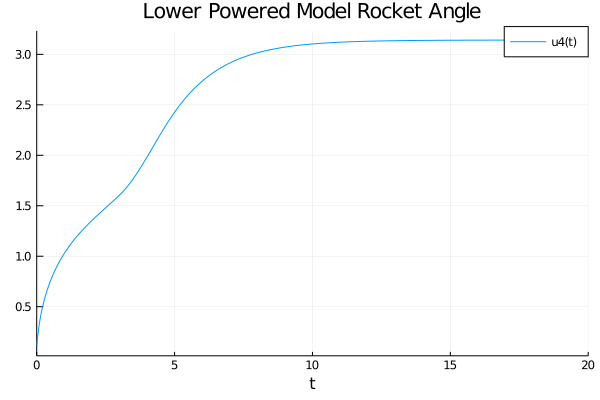

In [234]:
plot(sol,vars=(4),title = "Lower Powered Model Rocket Angle")

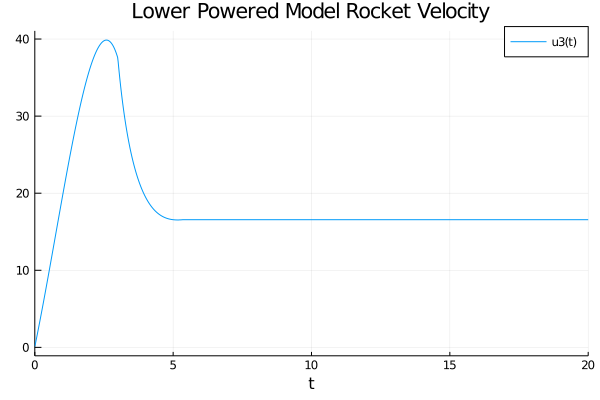

In [235]:
plot(sol,vars=(3),title = "Lower Powered Model Rocket Velocity")